In [1]:
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm

scenario_params = {"end_year": 2060,
                   "income_goal": 5000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "off", # this is a string and either (1) on or (2) off or (3) on_with_growth for details see the scenario_class.py file
            }

scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
scenario_1.compute_country_scenario_params()
print(scenario_1.compute_average_global_growth_rate())
scenario_1.run()

scenario_params2 =  {"end_year": 2060,
                   "income_goal": 5000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2       
                    "hysteresis_tech_progress": 0.01, # this is a growth rate, so between 0 and 1, which only applies if tech_hysteresis_assumption is on 
                   "gdp_assumption": "constant_ratio", # this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model", # this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
                   "tech_evolution_assumption": "plausible", # this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "on", # this is a string and either (1) on or (2) off for details see the scenario_class.py file
            }

scenario_2 = Scenario(scenario_params2)
scenario_2.compute_country_scenario_params()
print(scenario_2.compute_average_global_growth_rate())
scenario_2.run()


-0.0076870040023504504
-0.0076870040023504504


### Plot global quantities as a first check

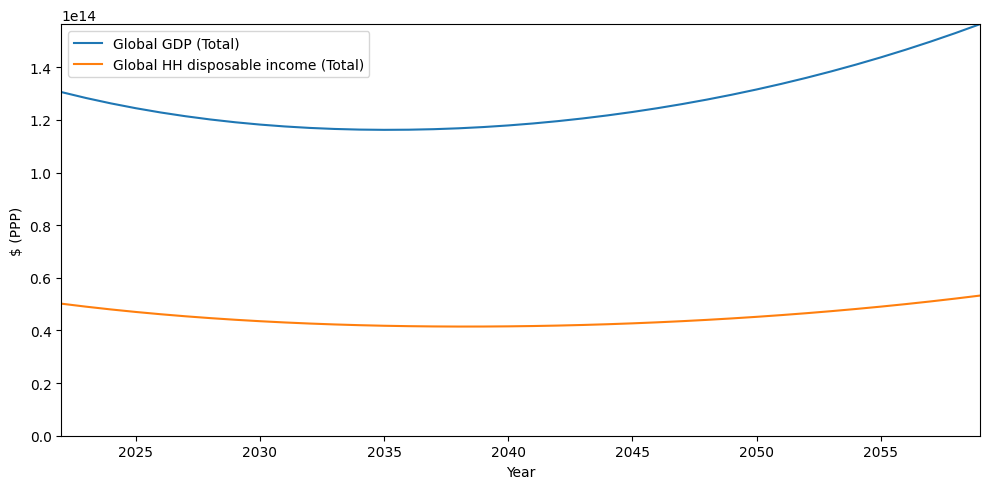

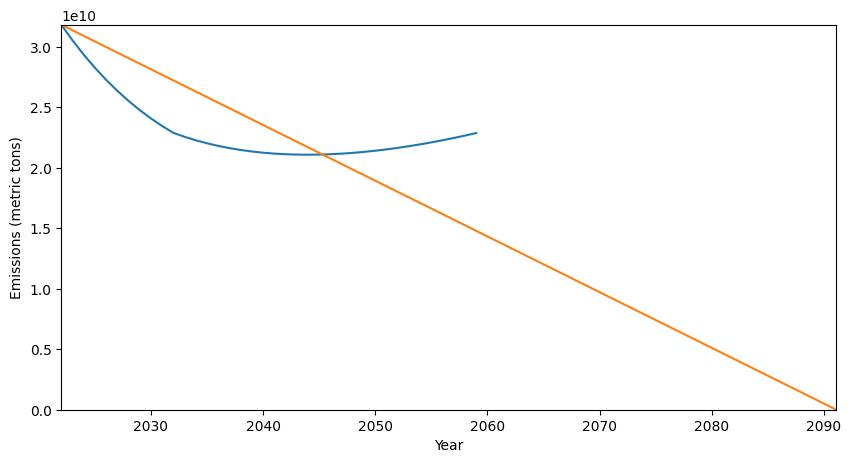

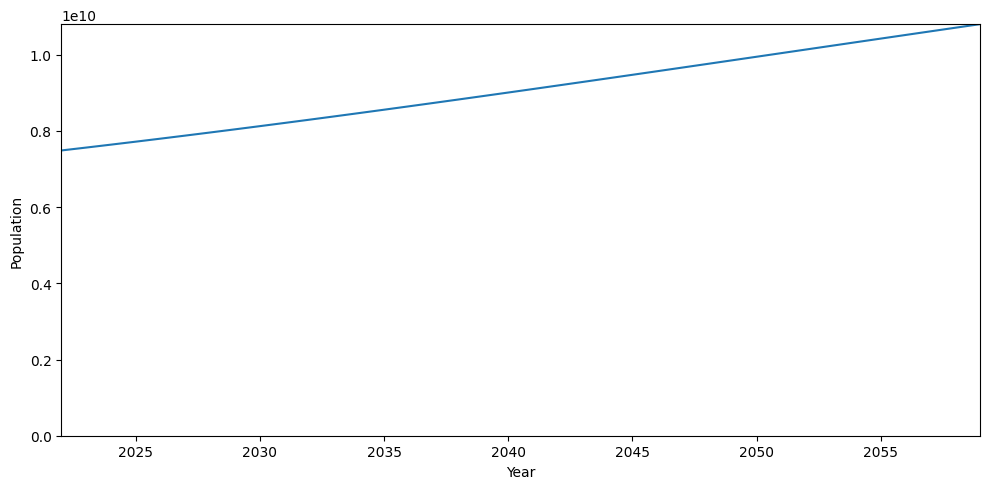

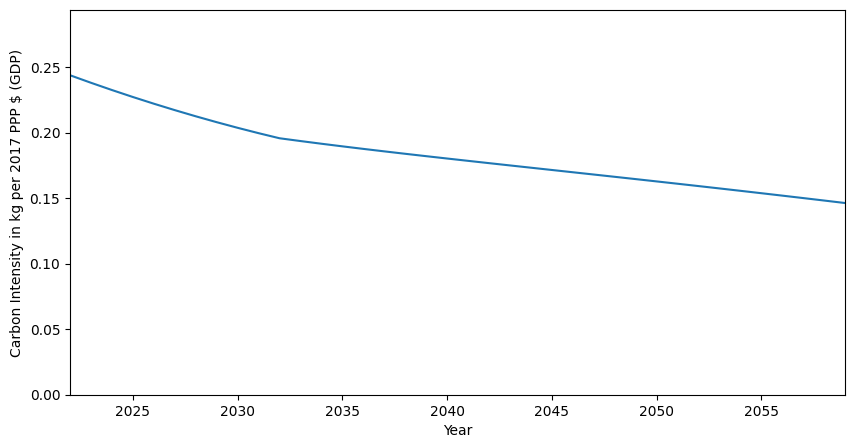

In [2]:
plotting_1 = Plots(scenario_1) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_1.plot_global_economy()
plotting_1.plot_global_emissions()
plotting_1.plot_global_population()
plotting_1.plot_global_carbon_intensity()

### Compute with steady state



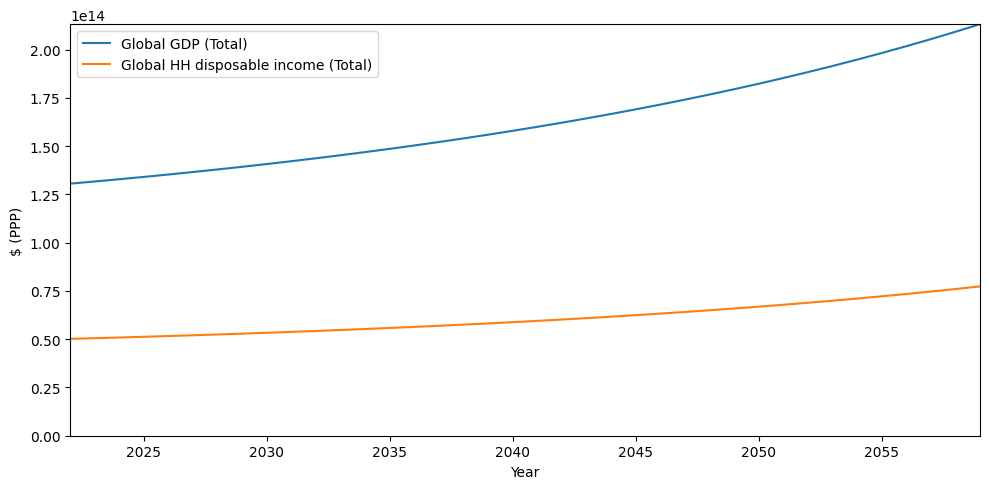

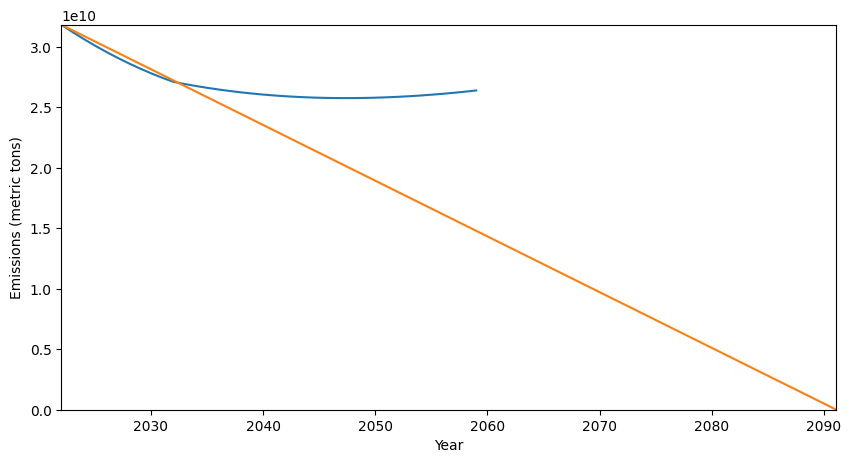

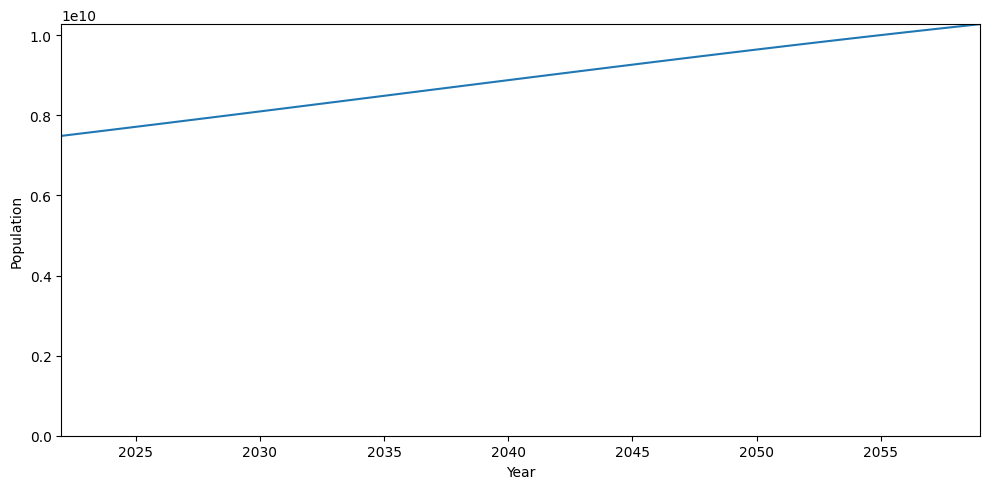

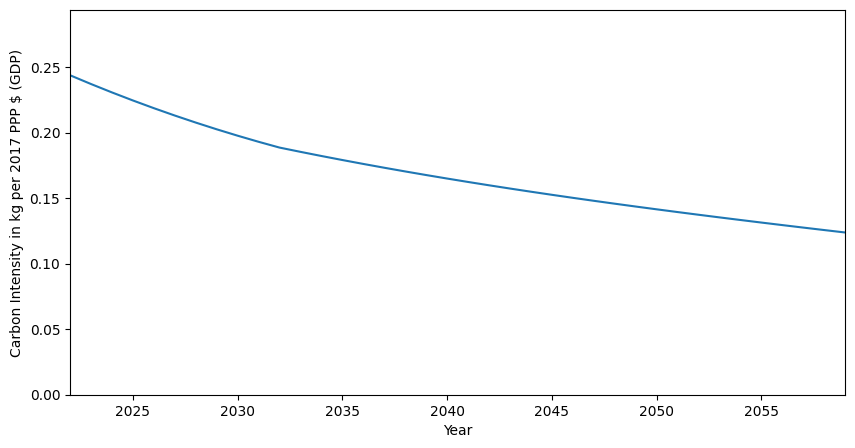

In [3]:
plotting_2 = Plots(scenario_2) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_2.plot_global_economy()
plotting_2.plot_global_emissions()
plotting_2.plot_global_population()
plotting_2.plot_global_carbon_intensity()

#### Compute global gdp per capita average

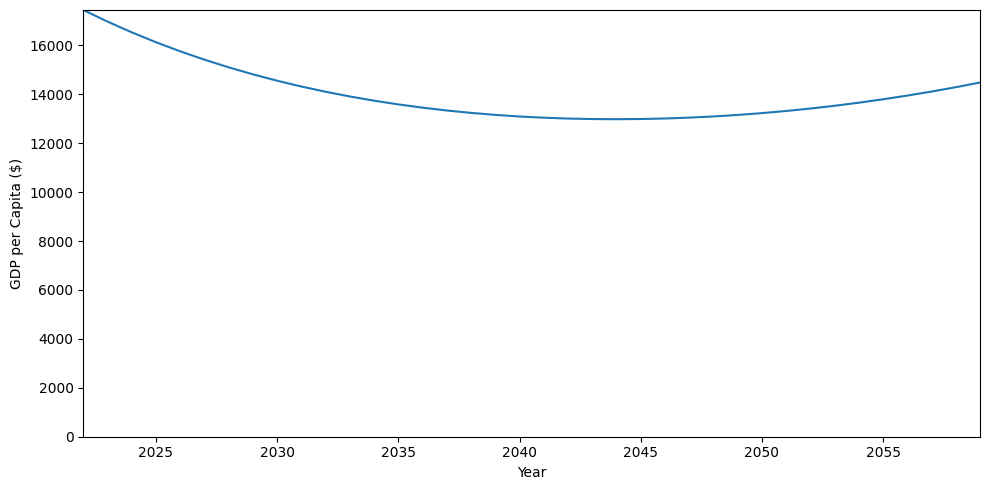

In [4]:
# Compute global gdp per capita average by dividing the global gdp by the global population for 2100 in the gdp trajectory and the pop trajectory
plotting_1.plot_global_gdp_per_capita()

### Plot example country, here the United States

[2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059]
[32471.366926206916, 30711.758650962747, 29057.29724573122, 27501.282146431226, 26037.45958346217, 24659.991831382187, 23363.428597176593, 22142.68042384294, 20992.993964859546, 19909.928995586495, 18889.337037362966, 17927.34147906806, 17020.319089257235, 16164.882819720466, 15357.865808477974, 14596.306496874317, 13877.434781592496, 13198.659128120265, 12557.554577495728, 11951.85158306776, 11379.425618558325, 10838.287502933727, 10326.574391505053, 9842.541386306957, 9384.553722169056, 8951.079488015468, 8540.682845822495, 8152.017712349613, 7783.821871249292, 7434.9114854715535, 7104.17598202242, 6790.5732831238365, 6493.12535966754, 6210.914084567177, 5943.07736520143, 5688.805535614986, 5447.337990512226, 5217.960044348203]


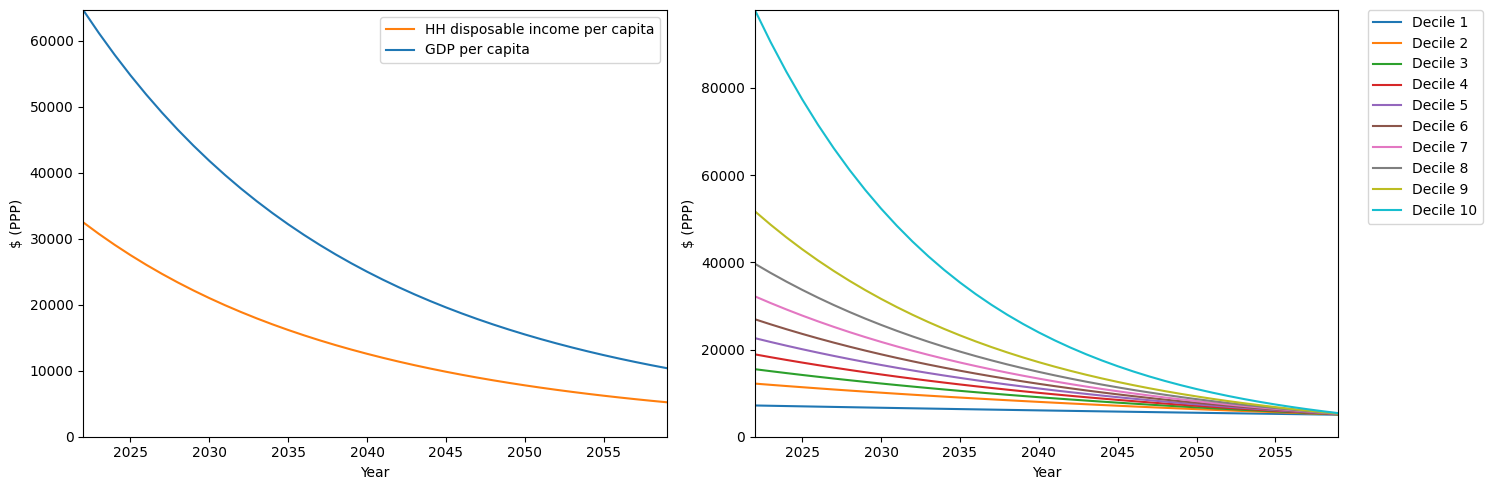

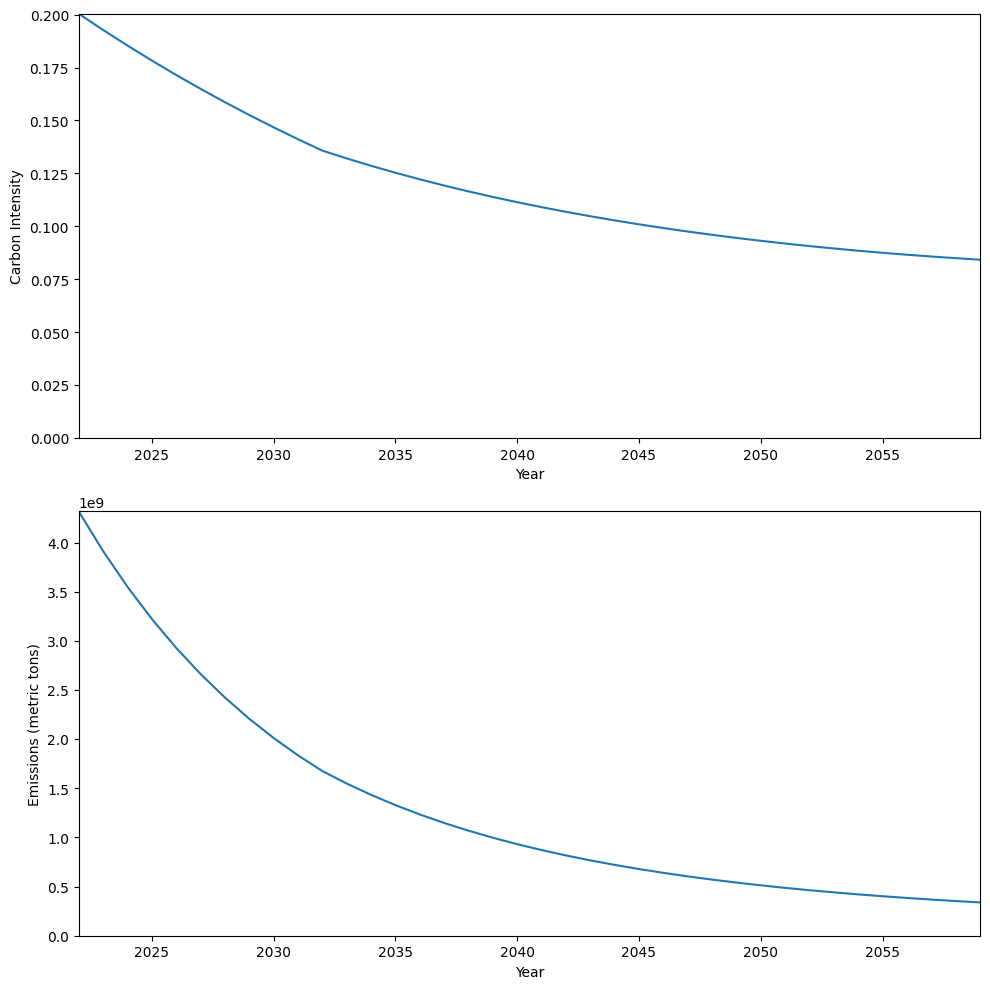

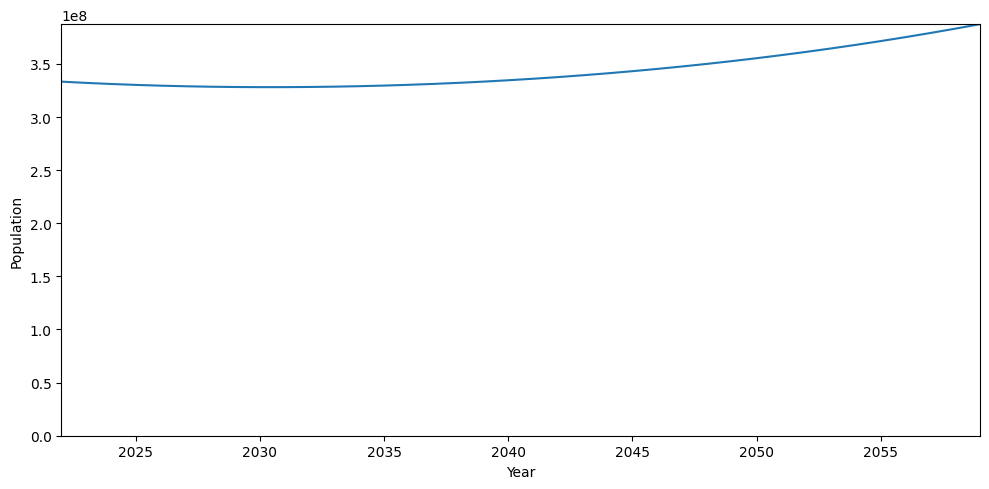

In [5]:
test_country = "United States"
plotting_1.plot_country_economy(test_country)
plotting_1.plot_country_emissions(test_country)
plotting_1.plot_country_population(test_country)

### Run Roser and Costa Rica scenario and look at economic growth rates distribution in each scenario, as well as the distribution of fair share overshoots per country in costa rica and roser scenario

In [6]:
# set up a costa rica scenario
scenario_params_cr = {"end_year": 2060,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "gdp_assumption": "constant_ratio", #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "UN_medium", #this is a string and either (1) UN_medium or (2) semi_log_model for details see the scenario_class.py file
                   "tech_evolution_assumption": "plausible", #this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file  
                   "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "off" # this is a string and either (1) on or (2) off for details see the scenario_class.py file
            }


# set up a denmark scenario
scenario_params_dk = {"end_year": 2100,
                   "income_goal": 20000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "gdp_assumption": "constant_ratio", #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "UN_medium", #this is a string and either (1) UN_medium or (2) semi_log_model for details see the scenario_class.py file
                   "tech_evolution_assumption": "plausible", #this is a string and either (1) plausible or (2) necessary for details see the scenario_class.py file
                   "tech_hysteresis_assumption": "off", # this is a string and either (1) on or (2) off for details see the scenario_class.py file 
                   "steady_state_high_income_assumption": "off" # this is a string and either (1) on or (2) off for details see the scenario_class.py file
            }


# run the costa rica scenario
scenario_cr = Scenario(scenario_params_cr)
scenario_cr.run()


# run the denmark scenario
scenario_dk = Scenario(scenario_params_dk)
scenario_dk.run()



KeyError: 'hysteresis_tech_progress'